# sqlite3 used for connecting sql and run sql queries

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

# connect the db using sqlite3

In [177]:
connection = sqlite3.connect(r"C:\Users\susee\Desktop\Practice\Pwd_str_prediction/pwd_data.sqlite")

# we can view the table details of the 'pwd_data.sqlite' file by uploading the file into the website - https://sqliteonline.com/

# reading the table form the sqlite file into one variable

In [178]:
user_data = pd.read_sql_query("SELECT * FROM Users" , connection)

In [179]:
user_data.shape

(100000, 3)

In [180]:
user_data.head(2)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1


# Data cleaning - remove the unwanted column from the data frame

In [181]:
user_data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [182]:
user_data.drop(["index"],axis=1,inplace =True)

In [183]:
user_data.head(2)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1


# finding duplicate data , missing data ,irrelavant data

In [184]:
user_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [185]:
user_data.duplicated().sum()

0

# finiding null value

In [186]:
user_data.isnull().sum()

password    0
strength    0
dtype: int64

In [187]:
user_data.isnull().any()

password    False
strength    False
dtype: bool

In [188]:
user_data.isnull().any().sum()

0

In [189]:
user_data.dtypes

password    object
strength     int64
dtype: object

# finding -ve vaues , disctinct value in strength column

In [190]:
user_data["strength"].unique()

array([1, 2, 0], dtype=int64)

# Data analysis - possible semantic analysis 
### password contains only numeric chracter 
### only upper case 
### alpha numeric character 
### title case 
### special charater

In [191]:
user_data.columns

Index(['password', 'strength'], dtype='object')

In [192]:
user_data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [193]:
user_data["password"][0]

'zxe870819'

In [194]:
type(user_data["password"][0])

str

# finding all character in password in numeric

In [195]:
user_data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [196]:
user_data[user_data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [197]:
# user having passwor as only numeric count

In [198]:
user_data[user_data["password"].str.isnumeric()].shape

(26, 2)

In [199]:
# Password with only upper case 

In [200]:
user_data[user_data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [201]:
user_data[user_data["password"].str.isupper()].shape

(1506, 2)

In [202]:
# Password with only alphabet

In [203]:
user_data[user_data["password"].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [204]:
user_data[user_data["password"].str.isalpha()].shape

(50, 2)

In [205]:
# Password with only alpha numeric

In [206]:
user_data[user_data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [207]:
user_data[user_data["password"].str.isalnum()].shape

(97203, 2)

In [208]:
# Password with only title case

In [209]:
user_data[user_data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [210]:
# password with special character

In [211]:
user_data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [212]:
import string

In [213]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [214]:
# finding password which contains special characters using function

In [215]:
def special(password):
    for char in password:
        if char in string.punctuation:
            return 1
        else :
            pass

In [216]:
user_data["password"].apply(special)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [217]:
# apply filter ==1

In [218]:
user_data["password"].apply(special) ==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [219]:
 # adding filter created 'user_data["password"].apply(special)' in our data frame

In [220]:
user_data[user_data["password"].apply(special)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


# feature Engineering

In [221]:
user_data["password"][0]

'zxe870819'

In [222]:
len(user_data["password"][0])

9

In [223]:
user_data["password"].str.len()

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64

In [224]:
# Creating the length column and adding into the dataframe

In [225]:
user_data["length"] = user_data["password"].str.len()

In [226]:
user_data

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8
...,...,...,...
99995,obejofi215,1,10
99996,fmiopvxb64,1,10
99997,czvrbun38,1,9
99998,mymyxe430,1,9


In [227]:
# example for reading lower case in string

In [228]:
password = "SuseE"

In [229]:
[char for char in password if char.islower()]

['u', 's', 'e']

In [230]:
len([char for char in password if char.islower()])

3

In [231]:
# normalising all data by divinng by length of password
len([char for char in password if char.islower()]) / len(password)

0.6

In [232]:
# including above logic in function

In [233]:
def fun_lowercase(line):
    return len([char for char in line if char.islower()]) / len(line)

In [234]:
def fun_uppercase(line):
    return len([char for char in line if char.isupper()]) / len(line)

In [235]:
def fun_number(line):
    return len([char for char in line if char.isdigit()]) / len(line)

In [236]:
#applying above function in the password column and cfreating new features lowercase,uppercase,numeric

In [237]:
user_data["lowercase"] = np.round(user_data["password"].apply(fun_lowercase),3)

In [238]:
user_data["digit"] = np.round(user_data["password"].apply(fun_number),3)

In [239]:
user_data["uppercase"] = np.round(user_data["password"].apply(fun_uppercase),3)

In [240]:
user_data

,password,strength,length,lowercase,digit,uppercase
0,zxe870819,1,9,0.333,0.667,0.0
1,xw46454nr23l,1,12,0.417,0.583,0.0
2,soporte13,1,9,0.778,0.222,0.0
3,accounts6000webhost.com,2,23,0.783,0.174,0.0
4,c443balg,1,8,0.625,0.375,0.0
...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.300,0.0
99996,fmiopvxb64,1,10,0.800,0.200,0.0
99997,czvrbun38,1,9,0.778,0.222,0.0
99998,mymyxe430,1,9,0.667,0.333,0.0


# defining function for special character

In [241]:
def special_char(line):
    spe_letter = []
    for char in line:
        if  not char.isalpha() and not char.isdigit():
            spe_letter.append(char)  
            return len(spe_letter)

In [242]:
user_data["special char"] = np.round(user_data["password"].apply(special_char),3)

In [243]:
user_data

,password,strength,length,lowercase,digit,uppercase,special char
0,zxe870819,1,9,0.333,0.667,0.0,NaN
1,xw46454nr23l,1,12,0.417,0.583,0.0,NaN
2,soporte13,1,9,0.778,0.222,0.0,NaN
3,accounts6000webhost.com,2,23,0.783,0.174,0.0,1.0
4,c443balg,1,8,0.625,0.375,0.0,NaN
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.300,0.0,NaN
99996,fmiopvxb64,1,10,0.800,0.200,0.0,NaN
99997,czvrbun38,1,9,0.778,0.222,0.0,NaN
99998,mymyxe430,1,9,0.667,0.333,0.0,NaN


In [244]:
user_data["special char"] / user_data["length"]

0             NaN
1             NaN
2             NaN
3        0.043478
4             NaN
           ...   
99995         NaN
99996         NaN
99997         NaN
99998         NaN
99999         NaN
Length: 100000, dtype: float64

In [245]:
user_data["special char"] = user_data["special char"] / user_data["length"]

In [246]:
user_data

,password,strength,length,lowercase,digit,uppercase,special char
0,zxe870819,1,9,0.333,0.667,0.0,NaN
1,xw46454nr23l,1,12,0.417,0.583,0.0,NaN
2,soporte13,1,9,0.778,0.222,0.0,NaN
3,accounts6000webhost.com,2,23,0.783,0.174,0.0,0.043478
4,c443balg,1,8,0.625,0.375,0.0,NaN
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.300,0.0,NaN
99996,fmiopvxb64,1,10,0.800,0.200,0.0,NaN
99997,czvrbun38,1,9,0.778,0.222,0.0,NaN
99998,mymyxe430,1,9,0.667,0.333,0.0,NaN


# Data analysis on created features
# when the password lenght is high and password strength is also high so we can group by password strength and calculate the mean,median,min and max vales of length

In [247]:
user_data.columns

Index(['password', 'strength', 'length', 'lowercase', 'digit', 'uppercase',
       'special char'],
      dtype='object')

In [248]:
user_data[['strength', 'length']].groupby(['strength']).agg(["min","max","mean","median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [249]:
# calculation mean and median for othre features

In [250]:
remain_col = ['length', 'lowercase', 'digit', 'uppercase',
       'special char']
for col in remain_col:
    print(col)
    print(user_data[[col, 'strength']].groupby(['strength']).agg(["min","max","mean","median"]))
    print('\n')
    

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase
         lowercase                        
               min    max      mean median
strength                                  
0              0.0  1.000  0.708050  0.714
1              0.0  0.923  0.630067  0.667
2              0.0  0.917  0.424679  0.400


digit
         digit                        
           min    max      mean median
strength                              
0          0.0  1.000  0.275383  0.286
1          0.0  0.923  0.360123  0.333
2          0.0  0.895  0.193796  0.188


uppercase
         uppercase                        
               min    max      mean median
strength                                  
0              0.0  1.000  0.012872  0.000
1              0.0  0.923  0.007915  0.000
2              0.0  

# Box plot for feauters

# we can put the box plot with 3 rows and 2 columns

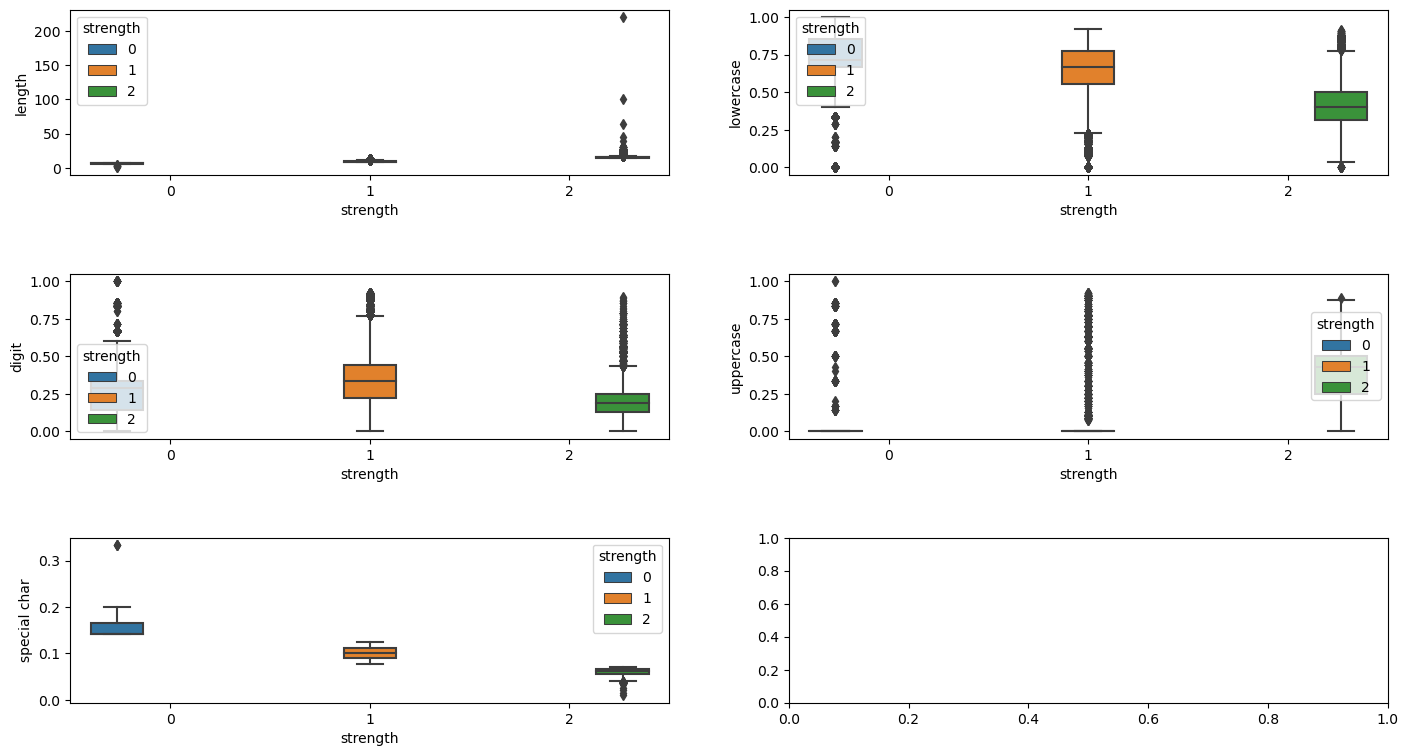

In [251]:
fig , ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(17,9))

sns.boxplot(x="strength" , y='length' ,hue='strength' , ax=ax1, data=user_data)
sns.boxplot(x="strength" , y='lowercase' ,hue='strength' , ax=ax2, data=user_data)
sns.boxplot(x="strength" , y='digit' , ax=ax3,hue='strength' , data=user_data)
sns.boxplot(x="strength" , y='uppercase' , ax=ax4,hue='strength' , data=user_data)
sns.boxplot(x="strength" , y='special char' , ax=ax5,hue='strength' , data=user_data)

plt.subplots_adjust(hspace=0.6)

# finding importance features for the ML model using univariate analysis
# we can use distibute and violin plot - will have both plot in 1 row 2 column using subplot

In [252]:
#defining function for plots

In [253]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [254]:
def pwd_plot(data,feature):
    plt.subplot(1,2,1)
    sns.violinplot(x='strength' , y=feature , data=user_data)
    plt.subplot(1,2,2)
#distribution plot for strength 1,2,3
    sns.distplot(data[user_data['strength']==0][feature] , color='blue' , label="0" , hist=False)
    sns.distplot(data[user_data['strength']==1][feature] , color='yellow' , label="1" , hist=False)
    sns.distplot(data[user_data['strength']==2][feature] , color='red' , label="2" , hist=False)
    plt.legend()
    plt.show()

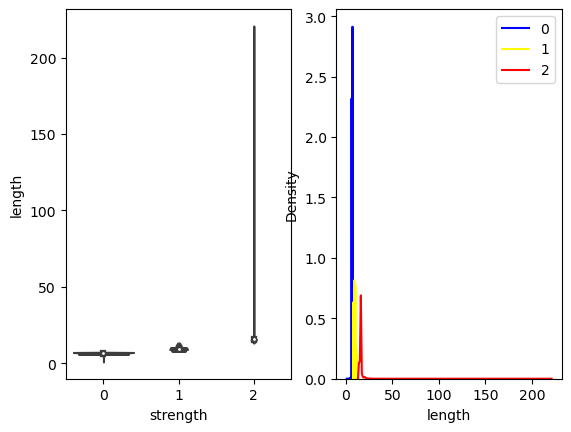

In [255]:
pwd_plot(user_data,"length")

In [256]:
user_data.columns

Index(['password', 'strength', 'length', 'lowercase', 'digit', 'uppercase',
       'special char'],
      dtype='object')

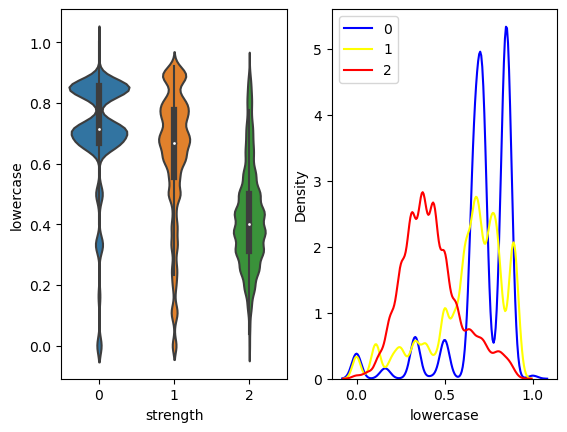

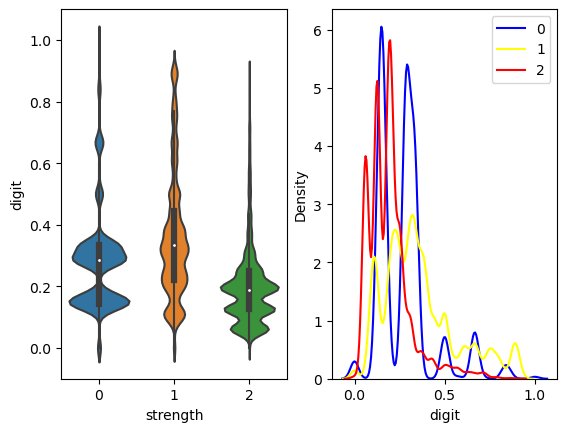

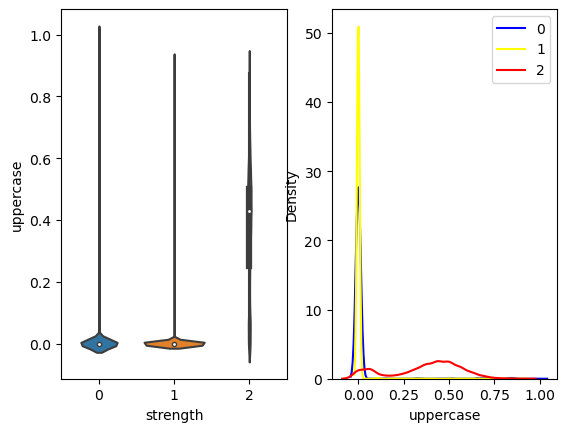

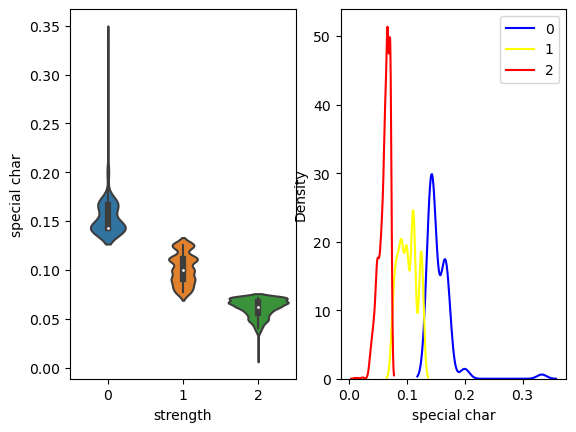

In [257]:
pwd_plot(user_data,"lowercase")
pwd_plot(user_data,"digit")
pwd_plot(user_data,"uppercase")
pwd_plot(user_data,"special char")

In [258]:
# TF-IDF (Term frequency and inverse document frequency) - vector representation - ML algo
# TF - specific word / total word in sentence

In [259]:
# Feature engineering - NLP technique

In [260]:
# shuffling data using sampling

In [261]:
user_data.sample(frac=1)

,password,strength,length,lowercase,digit,uppercase,special char
66206,st6c98z21,1,9,0.444,0.556,0.0,NaN
5226,cine2011,1,8,0.500,0.500,0.0,NaN
62203,tirupati11,1,10,0.800,0.200,0.0,NaN
5410,di88T6TYwMQFFoG5,2,16,0.250,0.250,0.5,NaN
97047,papa550s,1,8,0.625,0.375,0.0,NaN
...,...,...,...,...,...,...,...
8419,duswns123,1,9,0.667,0.333,0.0,NaN
82429,vivek116574,1,11,0.455,0.545,0.0,NaN
42882,pakistan67,1,10,0.800,0.200,0.0,NaN
75612,lista35,0,7,0.714,0.286,0.0,NaN


In [262]:
# storing the data in dataframe

In [263]:
pwd_df = user_data.sample(frac=1)

In [264]:
pwd_df

,password,strength,length,lowercase,digit,uppercase,special char
43031,javov983,1,8,0.625,0.375,0.000,NaN
54463,3y9ki45gh8,1,10,0.500,0.500,0.000,NaN
19992,really123,1,9,0.667,0.333,0.000,NaN
9854,70FDa0zMzNge9j8J,2,16,0.375,0.312,0.312,NaN
95452,rahayaan92,1,10,0.800,0.200,0.000,NaN
...,...,...,...,...,...,...,...
86059,nineth654,1,9,0.667,0.333,0.000,NaN
48828,wrupmljpgbo8,1,12,0.917,0.083,0.000,NaN
6594,S5mJW5Dk5Mwz1VrT,2,16,0.312,0.250,0.438,NaN
49509,manchas28,1,9,0.778,0.222,0.000,NaN


In [265]:
x = list(pwd_df["password"])

In [266]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [267]:
vectorizer = TfidfVectorizer(analyzer="char")

In [268]:
X = vectorizer.fit_transform(x)

In [269]:
X.shape

(100000, 99)

In [270]:
pwd_df["password"].shape

(100000,)

In [271]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [272]:
# sparse matrix - more 0 values

In [273]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [274]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.27009058, 0.        ,
       0.        , 0.        , 0.        , 0.30513694, 0.29142532,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.2007322 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.34830119, 0.        , 0.        , 0.        ,
       0.        , 0.24665308, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.7256507 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [275]:
pwd_df["password"]

43031            javov983
54463          3y9ki45gh8
19992           really123
9854     70FDa0zMzNge9j8J
95452          rahayaan92
               ...       
86059           nineth654
48828        wrupmljpgbo8
6594     S5mJW5Dk5Mwz1VrT
49509           manchas28
25164           bonez1985
Name: password, Length: 100000, dtype: object

In [276]:
# TF IDF values assigned

In [277]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [278]:
len(vectorizer.get_feature_names_out())

99

In [279]:
dframe2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [280]:
dframe2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model building - adding length and lowercase feature in dataframe 2

In [281]:
user_data.columns

Index(['password', 'strength', 'length', 'lowercase', 'digit', 'uppercase',
       'special char'],
      dtype='object')

In [282]:
dframe2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
dframe2['length']=user_data['length']
dframe2['lowercase']=user_data['lowercase']

In [284]:
dframe2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [285]:
y = user_data['strength']

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train,x_test,y_train,y_test = train_test_split(dframe2,y,test_size=0.20)

In [288]:
X_train.shape

(80000, 101)

In [289]:
y_train.shape

(80000,)

# using logistics regression classification model 

In [290]:
from sklearn.linear_model import LogisticRegression

In [291]:
model = LogisticRegression(multi_class='multinomial')

In [292]:
model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [293]:
y_pred = model.predict(x_test)

In [294]:
y_pred

array([1, 1, 1, ..., 0, 1, 2], dtype=int64)

In [295]:
from collections import Counter

In [296]:
Counter(y_pred)

Counter({1: 14759, 2: 2535, 0: 2706})

#predicting our password strength by giving example passwor to the model X_train with shape(101) where 99 features from 
#TF IDF + (length,lowercase)

#storing our sample password in the variable and storing as array and by calling vectorizer make as vector representation of the array

In [297]:
test_pwd = "Welcome@12345"

In [298]:
test_array = np.array([test_pwd])

In [299]:
test_matrix = vectorizer.transform(test_array)

In [300]:
test_matrix

<1x99 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [301]:
test_array

array(['Welcome@12345'], dtype='<U13')

test_matrix.toarray()

In [302]:
test_matrix.toarray().shape

(1, 99)

#test_matrix.toarray().shape have 99 dimention so add length and lowercase features

In [303]:
len(test_pwd)

13

In [304]:
# For mormalising the test_pwd find the lowercase frequency

In [305]:
[char for char in test_pwd if char.islower()]

['e', 'l', 'c', 'o', 'm', 'e']

In [306]:
len([char for char in test_pwd if char.islower()])/len(test_pwd)

0.46153846153846156

In [307]:
# append the length 13 , lowercase frequency 0.46 to the array

In [308]:
np.append(test_matrix.toarray() , (13,0.46))

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.16912172,  0.19566564,  0.21914636,  0.24196829,
        0.24497616,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.57465886,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.25510654,
        0.        ,  0.38159078,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.23486299,  0.22508615,
        0.        ,  0.20012962,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.2823575 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [309]:
# After adding length and lowercase frequency value the array dimension become 101

In [310]:
np.append(test_matrix.toarray() , (13,0.46)).shape

(101,)

In [311]:
# The dimension shape should be 1,101 so reshape it

In [312]:
np.append(test_matrix.toarray() , (13,0.46)).reshape(1,101)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.16912172,  0.19566564,  0.21914636,  0.24196829,
         0.24497616,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.57465886,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.25510654,
         0.        ,  0.38159078,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.23486299,  0.22508615,
         0.        ,  0.20012962,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.2823575 ,
         0.        ,  0.        ,  0.        ,  0. 

In [313]:
# now the shape become (1, 101)

In [314]:
np.append(test_matrix.toarray() , (13,0.46)).reshape(1,101).shape

(1, 101)

In [315]:
# store new array into new_matrix object and predict using model

In [316]:
new_matrix = np.append(test_matrix.toarray() , (13,0.46)).reshape(1,101)

In [317]:
new_matrix.shape

(1, 101)

In [318]:
# The out put comes in the array is the prediction and for password 'Welcome@12345' it predicted the array as 1

In [319]:
model.predict(new_matrix)

array([1], dtype=int64)

In [320]:
# creating function for predicting password strength

In [330]:
def predict():
    password = input("Please enter a passowrd :")
    test_array = np.array([password])
    test_matrix = vectorizer.transform(test_array)
    pass_len = len(password)
    normalised_lowecase = len([char for char in test_pwd if char.islower()])/len(password)
    new_matrix = np.append(test_matrix.toarray() , (pass_len,normalised_lowecase)).reshape(1,101)
    result = model.predict(new_matrix)
    
    if result == 2:
        return "strong password"
    elif result == 1:
        return "normal password"
    else:
        return "weak password"

In [331]:
# provide the password and press enter to predict the password strength

In [332]:
predict()

Please enter a passowrd :Susee3456@@


'normal password'

In [335]:
# Evaluation of our model by providing the Y_true and y_pred values

In [338]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [336]:
!pip install scikit-learn==0.24

     ---------------------------------------- 6.9/6.9 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\susee\\anaconda3\\Lib\\site-packages\\~klearn\\feature_extraction\\_hashing_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
# For x_test we have y_test and y_pred values so we will compare y_test and y_pred values

In [339]:
accuracy_score(y_test , y_pred)

1.0

In [340]:
confusion_matrix(y_test , y_pred)

array([[ 2706,     0,     0],
       [    0, 14759,     0],
       [    0,     0,  2535]], dtype=int64)

In [342]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2706
           1       1.00      1.00      1.00     14759
           2       1.00      1.00      1.00      2535

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

